In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns

In [2]:
df = pd.read_csv("boston_housing.csv")
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
df.shape

(506, 14)

In [4]:
df.size

7084

In [5]:
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
MEDV       0
dtype: int64

In [6]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
X = df.drop('MEDV', axis=1)
y = df['MEDV']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
model = Sequential([
    Dense(64, activation='relu', input_shape = (X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])

C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [16]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 583.2226 - mae: 22.2396 - val_loss: 514.7358 - val_mae: 21.1216
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 547.6843 - mae: 21.4366 - val_loss: 465.6075 - val_mae: 19.9740
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 514.3143 - mae: 20.3966 - val_loss: 404.3628 - val_mae: 18.4601
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 451.0794 - mae: 18.9362 - val_loss: 325.8208 - val_mae: 16.3045
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 339.6965 - mae: 16.1344 - val_loss: 236.0917 - val_mae: 13.3914
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 248.5597 - mae: 13.0731 - val_loss: 151.2751 - val_mae: 10.0093
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 160.5371 - mae: 10.1191 - val_loss: 91.5886 - val_mae: 7.2167
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 104.4438 - mae: 7.7534 - val_loss: 60.4195 - val_mae: 5.5475
Epoch 9/10
11/11 ━━━━━━━━━━━

In [17]:
test_mse, test_mae = model.evaluate(X_test, y_test)
print(f"\nTest Mean Absolute Error : {test_mae:.2f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29.6696 - mae: 3.8897 

Test Mean Absolute Error : 4.21


In [18]:
y_pred = model.predict(X_test)
print("\nPredicted House Prices : \n ", y_pred.flatten()[:10])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

Predicted House Prices : 
  [25.47797  33.11494  17.12793  26.637445 16.130867 13.701718 13.618194
 14.478087 13.250691 13.473652]


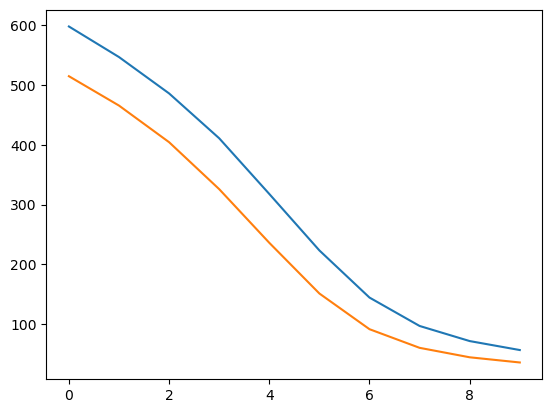

In [23]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label="Validation loss")
plt.show()